# Modelos avanzados de Deep Learning

En este ejemplo veremos algunos modelos más complejos de Deep Learning, en particular uno de aprendizaje de representaciones y uno de _transfer learning_.

In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

## Autoencoder

Un _autoencoder_ es una estructura de red simétrica que permite construir representaciones alternativas de los datos de entrada, y permite forzar o promover algunas propiedades deseables. 

In [4]:
import pandas as pd

satimage = pd.read_csv("https://www.openml.org/data/get_csv/3619/dataset_186_satimage.arff")

In [10]:
x = satimage.drop("class", 1)

In [38]:
enc_input = layers.Input(shape = (len(x.columns),))
encoder = layers.Dense(12, activation = "relu")(enc_input)
encoder = layers.Dense(2, activation = "sigmoid")(encoder)

decoder = layers.Dense(12, activation = "relu")(encoder)
decoder = layers.Dense(len(x.columns), activation = "linear")(decoder)

model = Model(enc_input, decoder)

In [39]:
model.compile(loss = "mean_squared_error", optimizer = "rmsprop")

In [40]:
model.fit(x, x, epochs = 15)

Epoch 1/15
6430/6430 [==============================] - 0s 64us/sample - loss: 0.8746
Epoch 2/15
6430/6430 [==============================] - 0s 37us/sample - loss: 0.5752
Epoch 3/15
6430/6430 [==============================] - 0s 36us/sample - loss: 0.3763
Epoch 4/15
6430/6430 [==============================] - 0s 38us/sample - loss: 0.2715
Epoch 5/15
6430/6430 [==============================] - 0s 39us/sample - loss: 0.2225
Epoch 6/15
6430/6430 [==============================] - 0s 39us/sample - loss: 0.1957
Epoch 7/15
6430/6430 [==============================] - 1s 87us/sample - loss: 0.1794
Epoch 8/15
6430/6430 [==============================] - 0s 40us/sample - loss: 0.1689
Epoch 9/15
6430/6430 [==============================] - 0s 38us/sample - loss: 0.1612
Epoch 10/15
6430/6430 [==============================] - 0s 41us/sample - loss: 0.1534
Epoch 11/15
6430/6430 [==============================] - 0s 41us/sample - loss: 0.1468
Epoch 12/15
6430/6430 [=============================

In [41]:
encoder_model = Model(enc_input, encoder)
h = encoder_model.predict(x)

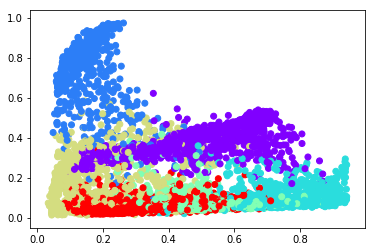

In [42]:
plt.scatter(h[:, 0], h[:, 1], c = satimage["class"], cmap = "rainbow")

## Transfer learning

_Transfer learning_ consiste en aprovechar el aprendizaje conseguido por una red para utilizarlo, con pequeños ajustes, en una red distinta para un problema diferente. El caso más común es la clasificación de imágenes: utilizamos una red que ha aprendido a discernir cientos o miles de clases de objetos para un problema más sencillo.

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

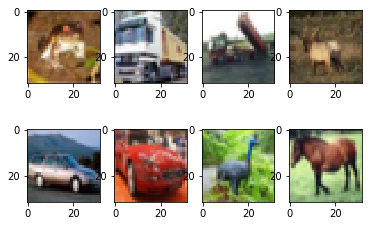

In [15]:
row_size = 4
fig, axs = plt.subplots(ncols=row_size, nrows=2)
for i in range(row_size):
    axs[0, i].imshow(x_train[i])
    axs[1, i].imshow(x_train[row_size + i])

In [28]:
def convnet(base_convnet_f, nclasses = 10):
    base_model = base_convnet_f(weights = 'imagenet', include_top = False)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(nclasses, activation = 'softmax')(x)

    model = Model(base_model.input, outputs = x)

    for layer in base_model.layers:
        layer.trainable = False

    return model

In [29]:
model = convnet(VGG16)

In [44]:
model.compile("rmsprop", "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [39]:
y_logits = to_categorical(y_train)
model.fit(x_train, y_logits, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 145s 3ms/step - loss: 2.1616
Epoch 2/5
50000/50000 [==============================] - 182s 4ms/step - loss: 1.8082
Epoch 3/5
50000/50000 [==============================] - 192s 4ms/step - loss: 1.7941
Epoch 4/5
50000/50000 [==============================] - 184s 4ms/step - loss: 1.7755
Epoch 5/5
50000/50000 [==============================] - 164s 3ms/step - loss: 1.7795


In [45]:
y_logits_test = to_categorical(y_test)
loss, acc = model.evaluate(x_test, y_logits_test)

print(f"Acierto: {round(100 * acc, 2)}%")

10000/10000 [==============================] - 20s 2ms/step


[1.5919736515045166, 0.4762]